In [1]:
import sys
sys.path.insert(0, '../../')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import h5py
import pickle
import bluepyopt
import os
os.chdir("genetic_alg/neuron_genetic_alg/neuron_files/bbp/")
from neuron import h
os.chdir("../../../")
import plot_helper as ph
os.chdir("../")


In [2]:
def readParamsCSV(fileName):
    fields = ['Param name', 'Base value','Lower bound', 'Upper bound']
    df = pd.read_csv(fileName,skipinitialspace=True, usecols=fields)
    
    paramsList = [tuple(x) for x in df.values]
    return paramsList

In [3]:
test_stim1_name = 'he_1_1_18'
test_stim2_name = 'chirp_f_0.12_to_0_a_3_to_3'
stims = h5py.File('./stims/stims_full.hdf5', 'r')
neg_stims = h5py.File('./stims/neg_stims.hdf5', 'r')
test_stim1 = stims[test_stim1_name][:]
test_stim2 = stims[test_stim2_name][:]

In [4]:
base_dir = os.getcwd()
base_dir

'/global/cscratch1/sd/zladd/axonstandardized/playground'

## Passive

In [45]:
os.chdir(base_dir)
date = '02_03_2021'
custom = 'base2'
best_indv_idx = "150"
bbp_passive_plot_path = '../../../plots/passive'
passive_run_dir = 'runs/bbp_passive_' + date + custom + '/genetic_alg/'
os.chdir(passive_run_dir)
if not os.path.isdir(bbp_passive_plot_path):
    os.mkdir(bbp_passive_plot_path)

### Score function

<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
step_-0.5
step_-0.45
step_-0.4
chirp_f_0_to_0.05_a_0.2_to_0.4_m_-0.3
chirp_f_0_to_0.05_a_0.2_to_0.3_m_-0.3
step_-0.35
chirp_f_0_to_0.05_a_0.2_to_0.2_m_-0.3
negramp_-0.5
negramp_-0.45
chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.1
chirp_f_0.05_to_0_a_0.2_to_0.3_m_-0.3
chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.3
chirp_f_0.05_to_0_a_0.2_to_0.4_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.3_m_-0.3
chirp_f_0.2_to_0_a_0.2_to_0.2_m_-0.1
negramp_-0.4
chirp_f_0_to_0.1_a_0.2_to_0.2_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.4_m_-0.3
chirp_f_0.3_to_0_a_0.2_to_0.2_m_-0.1
chirp_f_0.3_to_0_a_0.3_to_0.2_m_-0.3


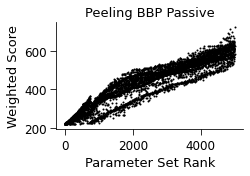

In [46]:
bbp_passive_opt_path = './objectives/multi_stim_without_sensitivity_bbp_passive_'\
                        + date +'_stims.hdf5'
bbp_passive_score_path = '../scores/'
bbp_passive_score_plot_path = os.path.join(bbp_passive_plot_path,"scores")

ph.plot_comb_scores(bbp_passive_opt_path, bbp_passive_score_path, 'Peeling BBP Passive', bbp_passive_score_plot_path)
print('Stims used to train:')
train_stim_names_passive = h5py.File(bbp_passive_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_passive:
    print(e.decode('ascii'))


### Genetic algorithm result

[7.052484790065126e-06, 9.135929430162425e-05, 1.4931249824454435e-06]


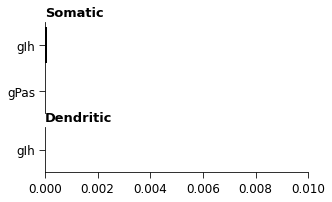

In [47]:
peeling_step = 'passive'
GA_result_path = './GPU_genetic_alg/python/best_indv_logs/best_indvs_gen_' \
                + best_indv_idx + '.pkl'
#GA_result_path = './GPUbest_indvs_gen_13.pkl'

params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_passive = h5py.File(params_path, 'r')['orig_'+peeling_step][0]
peeling_ind_passive_bbp = [3, 20, 23] # bbp Passive
base = [base_passive[i] for i in peeling_ind_passive_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_passive = [ph.params_bbp[i] for i in peeling_ind_passive_bbp]
normalized_indvs_passive_bbp, best_indvs_passive_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
print(normalized_indvs_passive_bbp[-1])
file_path_to_save = os.path.join(bbp_passive_plot_path,'GA_bbp_passive_scores')
ph.final_indv_plot_by_section(params_bbp_passive, normalized_indvs_passive_bbp[-1], 'For Passive Parameters', file_path_to_save, 0.01, 6,dend_inds= [0],soma_inds=[1,2],axon_inds=None,xlim=[0,0.01])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = normalized_indvs_passive_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]
    

### Train stim response

In [48]:
best_passive = list(base_passive)
for i in range(len(peeling_ind_passive_bbp)):
    best_passive[peeling_ind_passive_bbp[i]] = best_indvs_passive_bbp[-1][i]

<KeysViewHDF5 ['chirp_f_0.05_to_0_a_0.05_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.05_to_0.1_m_-0.1', 'chirp_f_0.05_to_0_a_0.05_to_0.2_m_-0.1', 'chirp_f_0.05_to_0_a_0.1_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.1_to_0.1_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.05_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.1', 'chirp_f_0.05_to_0_a_0.2_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.2_to_0.3_m_-0.3', 'chirp_f_0.05_to_0_a_0.2_to_0.4_m_-0.3', 'chirp_f_0.05_to_0_a_0.3_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.3_to_0.3_m_-0.3', 'chirp_f_0.05_to_0_a_0.4_to_0.2_m_-0.3', 'chirp_f_0.05_to_0_a_0.4_to_0.4_m_-0.3', 'chirp_f_0.1_to_0_a_0.05_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.05_to_0.1_m_-0.1', 'chirp_f_0.1_to_0_a_0.05_to_0.2_m_-0.1', 'chirp_f_0.1_to_0_a_0.1_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.1_to_0.1_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.05_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.1', 'chirp_f_0.1_to_0_a_0.2_to_0.2_m_-0.3', 'chirp_f_0.1_to_0_a_0.2_to_0.3_m_-0.3', 'chirp_f_0.1_to_0_a_0.2_to_0.4_m_-0.3',

(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'step_-0.5 (Training)'}>,
        <AxesSubplot:>], dtype=object))

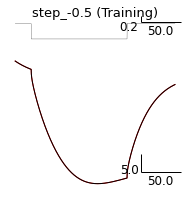

In [49]:
train_stim1_name_passive = train_stim_names_passive[0]
print(neg_stims.keys())
train_stim1_passive = neg_stims[train_stim1_name_passive][:]
train_volts_passive_target,times = ph.run_single_volts(base_passive, train_stim1_passive)
train_volts_passive_best_response,times = ph.run_single_volts(best_passive, train_stim1_passive)
file_path_to_save = os.path.join(bbp_passive_plot_path,'train_bbp_passive')
volts = [train_volts_passive_target, train_volts_passive_best_response]
print(volts[0])
print(volts[1])
ph.plot_stim_volts_pair(train_stim1_passive, volts, train_stim1_name_passive.decode('ascii')+' (Training)', 'for Passive Parameters', file_path_to_save)


### Test stim response

calculating  
0 
0 
finshed run matrix
calculating  
0 
0 
finshed run matrix
calculating  
0 
0 
finshed run matrix
calculating  
0 
0 
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.12_to_0_a_3_to_3 (Testing)'}>,
        <AxesSubplot:>], dtype=object))

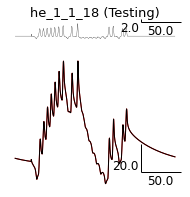

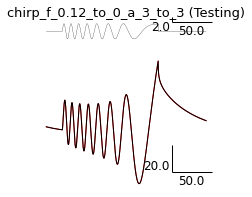

In [50]:
test_volts_passive_target1,times = ph.run_single_volts(base_passive, test_stim1)
test_volts_passive_best_response1,times = ph.run_single_volts(best_passive, test_stim1)
file_save_path = os.path.join(bbp_passive_plot_path,'test_bbp_passive_stim1')
ph.plot_stim_volts_pair(test_stim1, [test_volts_passive_target1, test_volts_passive_best_response1], test_stim1_name+' (Testing)', 'for Passive Parameters', file_save_path)

test_volts_passive_target2,times = ph.run_single_volts(base_passive, test_stim2)
test_volts_passive_best_response2,times = ph.run_single_volts(best_passive, test_stim2)
file_save_path = os.path.join(bbp_passive_plot_path,'test_bbp_passive_stim2')
ph.plot_stim_volts_pair(test_stim2, [test_volts_passive_target2, test_volts_passive_best_response2], test_stim2_name+' (Testing)', 'for Passive Parameters', file_save_path)


## Potassium 

In [51]:
os.chdir(base_dir)
date = '02_11_2021'
custom = 'full'
best_indv_idx = "121"
bbp_potassium_plot_path = '../../../plots/potassium'
potassium_run_dir = 'runs/bbp_potassium_' + date + custom + '/genetic_alg/'
os.chdir(potassium_run_dir)
if not os.path.isdir(bbp_potassium_plot_path):
    os.mkdir(bbp_potassium_plot_path)

### Score function

<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
negramp_-0.5
negramp_-0.45
negramp_-0.4
step_-0.3
step_-0.35
negramp_-0.35
step_-0.4
step_-0.5
step_-0.45
chirp_f_0_to_0.05_a_0.2_to_0.2_m_-0.3
chirp_f_0.3_to_0_a_0.2_to_0.4_m_-0.3
chirp_f_0.3_to_0_a_0.2_to_0.2_m_-0.3
chirp_f_0.3_to_0_a_0.2_to_0.3_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.2_m_-0.3
chirp_f_0_to_0.05_a_0.2_to_0.3_m_-0.3
chirp_f_0.2_to_0_a_0.2_to_0.3_m_-0.3
chirp_f_0.2_to_0_a_0.2_to_0.2_m_-0.3
chirp_f_0.2_to_0_a_0.2_to_0.4_m_-0.3
chirp_f_0_to_0.1_a_0.2_to_0.3_m_-0.3
step_-0.25


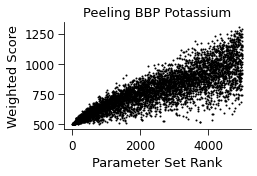

In [52]:
bbp_potassium_opt_path = './objectives/multi_stim_without_sensitivity_bbp_potassium_' \
                        + date + '_stims.hdf5'
bbp_potassium_score_path = '../scores/'
bbp_potassium_score_plot_path = os.path.join(bbp_potassium_plot_path,"scores")
ph.plot_comb_scores(bbp_potassium_opt_path, bbp_potassium_score_path, 'Peeling BBP Potassium', bbp_potassium_score_plot_path)
print('Stims used to train:')
train_stim_names_potassium = h5py.File(bbp_potassium_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_potassium:
    print(e.decode('ascii'))


### Genetic algorithm result

In [53]:
peeling_step = 'potassium'

GA_result_path = './GPU_genetic_alg/python/best_indv_logs/best_indvs_gen_' \
            + best_indv_idx + '.pkl'

params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_potassium = h5py.File(params_path, 'r')['orig_'+peeling_step][0]

realData = readParamsCSV("./params/params_bbp_" + peeling_step + ".csv")
base_potassium = np.array((np.array(realData)[:,1]), dtype=np.float64)

peeling_ind_potassium_bbp = [2, 3, 4, 6, 11, 12, 16, 20, 23] # bbp Potassium and Passive
base = [base_potassium[i] for i in peeling_ind_potassium_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_potassium = [ph.params_bbp[i] for i in peeling_ind_potassium_bbp]
normalized_indvs_potassium_bbp, best_indvs_potassium_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = os.path.join(bbp_potassium_plot_path,'GA_bbp_potassium_scores')
print(params_bbp_potassium)

['gSKv3_1bar_SKv3_1_apical', 'gIhbar_Ih_apical', 'gImbar_Im_apical', 'gK_Tstbar_K_Tst_axonal', 'gK_Pstbar_K_Pst_axonal', 'gSKv3_1bar_SKv3_1_axonal', 'gSKv3_1bar_SKv3_1_somatic', 'gIhbar_Ih_somatic', 'g_pas']


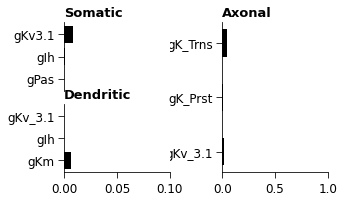

In [54]:
ph.final_indv_plot_by_section(params_bbp_potassium, normalized_indvs_potassium_bbp[-1], 'For Potassium Parameters', file_path_to_save,dend_inds=[0,1,2],axon_inds=[3,4,5],soma_inds=[6,7,8] ,xlim=[0,0.1])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_potassium_bbp[i]] = normalized_indvs_potassium_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_potassium_bbp[i]] = best_indvs_potassium_bbp[-1][i]
    

### Train stim response

In [55]:
best_potassium = list(base_potassium)
for i in range(len(peeling_ind_potassium_bbp)):
    best_potassium[peeling_ind_potassium_bbp[i]] = best_indvs_potassium_bbp[-1][i]

calculating  
0 
0.004226 
finshed run matrix
calculating  
0 
0.0041855419 
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'negramp_-0.5 (Training)'}>,
        <AxesSubplot:>], dtype=object))

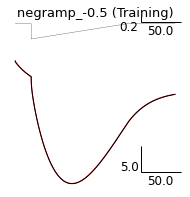

In [56]:
train_stim1_name_potassium = train_stim_names_potassium[0]
train_stim1_potassium = neg_stims[train_stim1_name_potassium][:]
train_volts_potassium_target,time = ph.run_single_volts(base_potassium, train_stim1_potassium)
train_volts_potassium_best_response,time = ph.run_single_volts(best_potassium, train_stim1_potassium)
file_save_path =  os.path.join(bbp_potassium_plot_path,'train_bbp_potassium')
ph.plot_stim_volts_pair(train_stim1_potassium, [train_volts_potassium_target, train_volts_potassium_best_response], train_stim1_name_potassium.decode('ascii')+' (Training)', 'for Potassium Parameters', file_save_path)


### Test stim response

calculating  
0 
0.004226 
finshed run matrix
calculating  
0 
0.0041855419 
finshed run matrix
calculating  
0 
0.004226 
finshed run matrix
calculating  
0 
0.0041855419 
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.12_to_0_a_3_to_3 (Testing)'}>,
        <AxesSubplot:>], dtype=object))

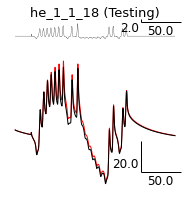

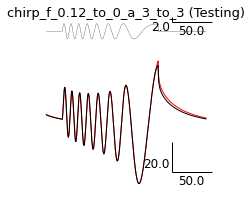

In [57]:
test_volts_potassium_target1,times = ph.run_single_volts(base_potassium, test_stim1)
test_volts_potassium_best_response1,times = ph.run_single_volts(best_potassium, test_stim1)
file_save_path =os.path.join(bbp_potassium_plot_path,'test_bbp_potassium_stim1')
ph.plot_stim_volts_pair(test_stim1, [test_volts_potassium_target1, test_volts_potassium_best_response1], test_stim1_name+' (Testing)', 'for Potassium Parameters', file_save_path)

test_volts_potassium_target2,times = ph.run_single_volts(base_potassium, test_stim2)
test_volts_potassium_best_response2,times = ph.run_single_volts(best_potassium, test_stim2)
file_save_path =os.path.join(bbp_potassium_plot_path,'test_bbp_potassium_stim2')
ph.plot_stim_volts_pair(test_stim2, [test_volts_potassium_target2, test_volts_potassium_best_response2], test_stim2_name+' (Testing)', 'for Potassium Parameters', file_save_path)


## Calcium

In [58]:
os.chdir(base_dir)
date = '02_14_2021'
custom = 'full'
best_indv_idx = "91"
bbp_calcium_plot_path = '../../../plots/calcium'
calcium_run_dir = 'runs/bbp_calcium_' + date + custom + '/genetic_alg/'
os.chdir(calcium_run_dir)
if not os.path.isdir(bbp_calcium_plot_path):
    os.mkdir(bbp_calcium_plot_path)

### Score function

<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
chirp_f_0_to_0.3_a_0.05_to_0.2_m_-0.1
chirp_f_0_to_0.1_a_0.05_to_0.1_m_-0.1
he_1_6_3
he_1_1_8
chirp_f_0_to_0.2_a_0.05_to_0.2_m_-0.1
chirp_f_0.24_to_0_a_6_to_6
he_3_19_20
chirp_f_0_to_0.05_a_0.05_to_0.1_m_-0.1
sin_f_0.3_a_6_m_0
negramp_-0.3
chirp_f_0.26_to_0_a_6_to_6
sin_f_1_a_3_m_0
chirp_f_0_to_0.2_a_0.05_to_0.1_m_-0.1
sin_f_0.9_a_6_m_0
chirp_f_0.26_to_0_a_9_to_3
chirp_f_0.16_to_0_a_6_to_6
he_3_14_19
chirp_f_0.16_to_0_a_3_to_3
he_3_14_8
chirp_f_0.28_to_0_a_9_to_3


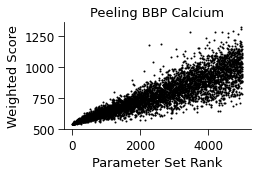

In [59]:
bbp_calcium_opt_path = './objectives/multi_stim_without_sensitivity_bbp_calcium_' \
+ date + '_stims.hdf5'
bbp_calcium_score_path = '../scores/'
bbp_calcium_plot_score_path = os.path.join(bbp_calcium_plot_path, "opt_scores")
ph.plot_comb_scores(bbp_calcium_opt_path, bbp_calcium_score_path, 'Peeling BBP Calcium', bbp_calcium_plot_score_path)
print('Stims used to train:')
train_stim_names_calcium = h5py.File(bbp_calcium_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_calcium:
    print(e.decode('ascii'))


### Genetic algorithm result

In [60]:
peeling_step = 'calcium'
GA_result_path = './GPU_genetic_alg/python/best_indv_logs/best_indvs_gen_' \
 + best_indv_idx + '.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_calcium = h5py.File(params_path, 'r')['orig_'+peeling_step][0]#

peeling_ind_calcium_bbp = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Calcium 

# USE THIS TO COMPARE TO ACTUAL BASE PARAMS NOT THE ONE FROM PREV STEP
paramsCSV = './params/params_bbp_calcium.csv'
data = readParamsCSV(paramsCSV)
base_calcium = np.array(np.array(data)[:,1], dtype=np.float64)#[:,1]

peeling_ind_calcium_bbp = [2,3,4,6,9,10,11,12,14,16,17,18,20,22,23] # bbp Calcium 

base = [base_calcium[i] for i in peeling_ind_calcium_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_calcium = [ph.params_bbp[i] for i in peeling_ind_calcium_bbp]
normalized_indvs_calcium_bbp, best_indvs_calcium_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = os.path.join(bbp_calcium_plot_path,'GA_bbp_calcium_scores')

print(params_bbp_calcium)

['gSKv3_1bar_SKv3_1_apical', 'gIhbar_Ih_apical', 'gImbar_Im_apical', 'gK_Tstbar_K_Tst_axonal', 'gSK_E2bar_SK_E2_axonal', 'gCa_HVAbar_Ca_HVA_axonal', 'gK_Pstbar_K_Pst_axonal', 'gSKv3_1bar_SKv3_1_axonal', 'gCa_LVAstbar_Ca_LVAst_axonal', 'gSKv3_1bar_SKv3_1_somatic', 'gSK_E2bar_SK_E2_somatic', 'gCa_HVAbar_Ca_HVA_somatic', 'gIhbar_Ih_somatic', 'gCa_LVAstbar_Ca_LVAst_somatic', 'g_pas']


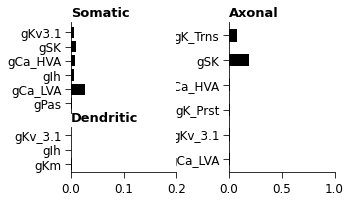

In [61]:
ph.final_indv_plot_by_section(params_bbp_calcium, normalized_indvs_calcium_bbp[-1], 'For Calcium Parameters', file_path_to_save, 1, 15,dend_inds = [0,1,2],axon_inds = [3,4,5,6,7,8], soma_inds = [9,10,11,12,13,14],xlim=[0,0.2])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_calcium_bbp[i]] = normalized_indvs_calcium_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_calcium_bbp[i]] = best_indvs_calcium_bbp[-1][i]
  

### Train stim response

In [62]:
best_calcium = list(base_calcium)
for i in range(len(peeling_ind_calcium_bbp)):
    best_calcium[peeling_ind_calcium_bbp[i]] = best_indvs_calcium_bbp[-1][i]

calculating  
0 
0.004226 
finshed run matrix
calculating  
0 
0.0045570334 
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'he_1_1_8 (Training)'}>,
        <AxesSubplot:>], dtype=object))

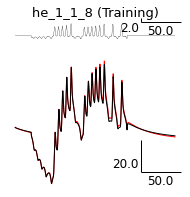

In [63]:
train_stim1_name_calcium = train_stim_names_calcium[3]
train_stim1_calcium = stims[train_stim1_name_calcium][:]
train_volts_calcium_target,times = ph.run_single_volts(base_calcium, train_stim1_calcium)
train_volts_calcium_best_response,times = ph.run_single_volts(best_calcium, train_stim1_calcium)
file_save_path = os.path.join(bbp_calcium_plot_path,'train_bbp_calcium')
ph.plot_stim_volts_pair(train_stim1_calcium, [train_volts_calcium_target, train_volts_calcium_best_response], train_stim1_name_calcium.decode('ascii')+' (Training)', 'for Calcium Parameters', file_save_path)


calculating  
0 
0.004226 
finshed run matrix
calculating  
0 
0.0045570334 
finshed run matrix
calculating  
0 
0.004226 
finshed run matrix
calculating  
0 
0.0045570334 
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.12_to_0_a_3_to_3 (Testing)'}>,
        <AxesSubplot:>], dtype=object))

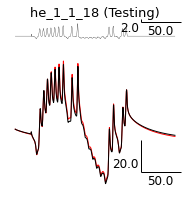

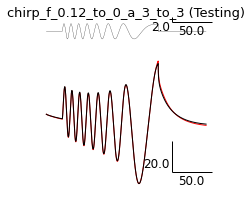

In [64]:
test_volts_calcium_target1,times = ph.run_single_volts(base_calcium, test_stim1)
test_volts_calcium_best_response1,times = ph.run_single_volts(best_calcium, test_stim1)
file_save_path = os.path.join(bbp_calcium_plot_path,'test_bbp_calcium_stim1')
ph.plot_stim_volts_pair(test_stim1, [test_volts_calcium_target1, test_volts_calcium_best_response1], test_stim1_name+' (Testing)', 'for Calcium Parameters', file_save_path)

test_volts_calcium_target2,times = ph.run_single_volts(base_calcium, test_stim2)
test_volts_calcium_best_response2,times = ph.run_single_volts(best_calcium, test_stim2)
file_save_path = os.path.join(bbp_calcium_plot_path,'test_bbp_calcium_stim2')
ph.plot_stim_volts_pair(test_stim2, [test_volts_calcium_target2, test_volts_calcium_best_response2], test_stim2_name+' (Testing)', 'for Calcium Parameters', file_save_path)


## Sodium

In [65]:
os.chdir(base_dir)
date = '02_18_2021'
custom = 'full'
best_indv_idx = "78"
bbp_sodium_plot_path = '../../../plots/sodium'
sodium_run_dir = 'runs/bbp_sodium_' + date + custom + '/genetic_alg/'
os.chdir(sodium_run_dir)
print(os.getcwd())
if not os.path.isdir(bbp_sodium_plot_path):
    os.mkdir(bbp_sodium_plot_path)

/global/cscratch1/sd/zladd/axonstandardized/playground/runs/bbp_sodium_02_18_2021full/genetic_alg


### Score function

<KeysViewHDF5 ['opt_stim_name_list', 'opt_weight_list', 'ordered_score_function_list']>
Stims used to train:
chirp_f_0.2_to_0_a_3_to_9
chirp_f_0_to_0.14_a_3_to_9
chirp_f_0_to_0.16_a_3_to_9
chirp_f_0.22_to_0_a_9_to_3
negramp_0.56
sin_f_0.9_a_9_m_0
he_1_2_2
step_-0.05
sin_f_0.3_a_3_m_0
step_-0.1
chirp_f_0_to_0.05_a_0.05_to_0.05_m_-0.1
chirp_f_0.3_to_0_a_0.1_to_0.05_m_-0.1
chirp_f_0.3_to_0_a_0.05_to_0.1_m_-0.1
chirp_f_0.3_to_0_a_0.05_to_0.05_m_-0.1
chirp_f_0_to_0.12_a_3_to_6
chirp_f_0.3_to_0_a_0.05_to_0.2_m_-0.1
chirp_f_0.2_to_0_a_0.1_to_0.1_m_-0.1
chirp_f_0.3_to_0_a_0.2_to_0.05_m_-0.1
chirp_f_0.24_to_0_a_9_to_3
sin_f_0.9_a_6_m_0


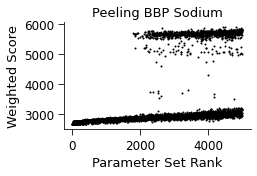

In [66]:
bbp_sodium_opt_path = './objectives/multi_stim_without_sensitivity_bbp_sodium_'\
+ date + '_stims.hdf5'
bbp_sodium_score_path = '../scores/'
bbp_sodium_score_plot_path = os.path.join(bbp_sodium_plot_path, "scores")
ph.plot_comb_scores(bbp_sodium_opt_path, bbp_sodium_score_path, 'Peeling BBP Sodium', bbp_sodium_score_plot_path)
print('Stims used to train:')
train_stim_names_sodium = h5py.File(bbp_sodium_opt_path, 'r')['opt_stim_name_list'][:]
for e in train_stim_names_sodium:
    print(e.decode('ascii'))


### Genetic algorithm result

In [67]:
peeling_step = 'sodium'
GA_result_path = './GPU_genetic_alg/python/best_indv_logs/best_indvs_gen_' \
+ best_indv_idx + '.pkl'
params_path = './params/params_bbp_'+peeling_step+'.hdf5'
base_sodium = h5py.File(params_path, 'r')['orig_'+peeling_step][0]

realData = readParamsCSV("./params/params_bbp_peeling_description.csv")
base_sodium = np.array((np.array(realData)[:,1]), dtype=np.float64)

peeling_ind_sodium_bbp = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 22, 23] # bbp Sodium, Potassium and Passive
base = [base_sodium[i] for i in peeling_ind_sodium_bbp]
lbs = [0.01*p for p in base]
ubs = [100*p for p in base]
params_bbp_sodium = [ph.params_bbp[i] for i in peeling_ind_sodium_bbp]
allparams = [ph.params_bbp[i] for i in range(24)]

[<AxesSubplot:title={'left':'Somatic'}>, <AxesSubplot:title={'left':'Dendritic'}>, <AxesSubplot:title={'left':'Axonal'}>]


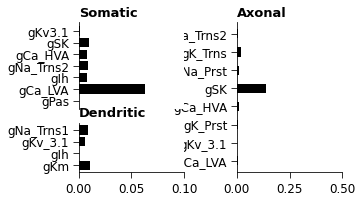

In [68]:
normalized_indvs_sodium_bbp, best_indvs_sodium_bbp = ph.read_and_normalize_with_neg(GA_result_path, base, lbs, ubs)
file_path_to_save = os.path.join(bbp_sodium_plot_path,'GA_bbp_sodium')
axs = ph.final_indv_plot_by_section(params_bbp_sodium, \
                                    normalized_indvs_sodium_bbp[-1],\
                                    'For Sodium Parameters',\
                                    file_path_to_save, 0.5, 12,\
                                    xlim=[0,0.1])
for i in range(len(base)):
    ph.normalized_indvs_bbp_overall[peeling_ind_sodium_bbp[i]] = normalized_indvs_sodium_bbp[-1][i]
    ph.best_indvs_bbp_overall[peeling_ind_sodium_bbp[i]] = best_indvs_sodium_bbp[-1][i]
print(axs)    
axs[2].set_xlim([0,0.5])
plt.show()

### Train stim response

In [69]:
best_sodium = list(base_sodium)
for i in range(len(peeling_ind_sodium_bbp)):
    best_sodium[peeling_ind_sodium_bbp[i]] = best_indvs_sodium_bbp[-1][i]

calculating  
0.026145 
0.004226 
finshed run matrix
calculating  
0.0024230538 
0.0017153713 
finshed run matrix


(<Figure size 226.772x221.102 with 2 Axes>,
 array([<AxesSubplot:title={'center':'chirp_f_0.2_to_0_a_3_to_9 (Training)'}>,
        <AxesSubplot:>], dtype=object))

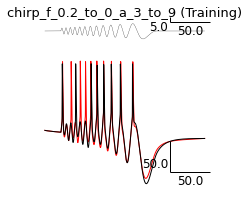

In [70]:
train_stim1_name_sodium = train_stim_names_sodium[0]
train_stim1_sodium = stims[train_stim1_name_sodium][:]
train_volts_sodium_target,times = ph.run_single_volts(base_sodium, train_stim1_sodium)
train_volts_sodium_best_response,times = ph.run_single_volts(best_sodium, train_stim1_sodium)
file_save_path = os.path.join(bbp_sodium_plot_path,'train_bbp_sodium')
ph.plot_stim_volts_pair(train_stim1_sodium, [train_volts_sodium_target, train_volts_sodium_best_response], train_stim1_name_sodium.decode('ascii')+' (Training)', 'for Sodium Parameters', file_save_path)


### Test stim response

In [ ]:
test_volts_sodium_target1,times = ph.run_single_volts(base_sodium, test_stim1)
test_volts_sodium_best_response1,times = ph.run_single_volts(best_sodium, test_stim1)
file_save_path = os.path.join(bbp_sodium_plot_path,'test_bbp_sodium_stim1')
ph.plot_stim_volts_pair(test_stim1, [test_volts_sodium_target1, test_volts_sodium_best_response1], test_stim1_name+' (Testing)', 'for Sodium Parameters', file_save_path)

test_volts_sodium_target2,times = ph.run_single_volts(base_sodium, test_stim2)
test_volts_sodium_best_response2,times = ph.run_single_volts(best_sodium, test_stim2)
file_save_path = os.path.join(bbp_sodium_plot_path,'test_bbp_sodium_stim2')
ph.plot_stim_volts_pair(test_stim2, [test_volts_sodium_target2, test_volts_sodium_best_response2], test_stim2_name+' (Testing)', 'for Sodium Parameters', file_save_path)


calculating  
0.026145 
0.004226 
finshed run matrix
calculating  
0.0024230538 
0.0017153713 
finshed run matrix
calculating  
0.026145 
0.004226 


In [ ]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

# Plot for GA result
def final_indv_plot(param_names, final_best_indv, title, file_path_to_save=None, max_xtic=1, vert_size=10):
    plt.figure(figsize=(cm_to_in(8.5), cm_to_in(vert_size)))
    ax = plt.gca()
    y_pos = np.arange(len(param_names))
    ax.barh(y_pos, final_best_indv, height=0.5, align='center', linestyle='-', color='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(param_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.axvline(x=0, color='black', linewidth=0.4 ,linestyle='--')
    ax.set_xlim(0, max_xtic)
    ax.set_xticks([0, max_xtic])
    ax.set_ylabel('Parameters')
    ax.set_xlabel('Normalized Distance')
    ax.set_title('Deviation From Truth Value ' + title)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

# Code for optimization results analysis
def read_and_normalize_with_neg(opt_result_path, base, lower_bounds, upper_bounds):
    with open(opt_result_path, 'rb') as f:
        best_indvs = pickle.load(f, encoding = "latin1")
    normalized_indvs = []
    for i in range(len(best_indvs)):
        normalized = []
        for j in range(len(best_indvs[i])):
            if (best_indvs[i][j] < base[j]):
                new_value = abs((best_indvs[i][j] - base[j])/(ubs[j] - base[j]))
                normalized.append(new_value)
            else:
                new_value = abs((best_indvs[i][j] - base[j])/(ubs[j] - base[j]))
                normalized.append(new_value)
        normalized_indvs.append(normalized)
    return normalized_indvs, best_indvs

def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
    plt.figure(figsize=(cm_to_in(8.5+6), cm_to_in(12)))
    plt.subplot(2, 1, 1)
    plt.title(title_stim)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stim, color='black', linewidth=0.7)
    plt.subplot(2, 1, 2)
    plt.title('Voltage Response '+title_volts)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(volts[0], label='target', color='black')
    plt.plot(volts[1], label='best individual', color='crimson')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout(pad=1)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

def cm_to_in(cm):
    return cm/2.54

# Running a single volt
def run_single_volts(param_set, stim_data, ntimestep = 10000, dt = 0.02):
    run_file = './run_model_cori.hoc'
    h.load_file(run_file)
    total_params_num = len(param_set)
    timestamps = np.array([dt for i in range(ntimestep)])
    h.curr_stim = h.Vector().from_python(stim_data)
    h.transvec = h.Vector(total_params_num, 1).from_python(param_set)
    h.stimtime = h.Matrix(1, len(timestamps)).from_vector(h.Vector().from_python(timestamps))
    h.ntimestep = ntimestep
    h.runStim()
    out = h.vecOut.to_python()
    return np.array(out)

def plot_comb_scores(opt_path, score_path, title, plot_save_path=None):
    opt_result = h5py.File(opt_path)
    ordered_score_function_list = [e.decode('ascii') for e in opt_result['ordered_score_function_list'][:]]
    optimization_stim_names = [e.decode('ascii') for e in opt_result['opt_stim_name_list'][:]]
    optimization_weightes = opt_result['opt_weight_list'][:]
    best_stims_score_list = []
    for score_name in optimization_stim_names:
        curr_score_data = h5py.File(score_path+score_name+'_scores.hdf5', 'r')
        for sf in ordered_score_function_list:
            curr_stim_sf_pair = curr_score_data['norm_pin_scores_'+sf][:]
            best_stims_score_list.append(curr_stim_sf_pair)
    combined_score = sum([best_stims_score_list[i]*optimization_weightes[i] for i in range(len(optimization_weightes))])
    plt.figure(figsize=(cm_to_in(8.5), cm_to_in(5)))
    plt.title(title)
    plt.xlabel('Parameter Set Rank')
    plt.ylabel('Weighted Score')
    time_step = range(len(combined_score))
    plt.scatter(time_step, combined_score, s=1, color='black')
    if plot_save_path:
        plt.savefig(plot_save_path+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")
